In [ ]:
import random
import numpy as np
 
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
sigMatrix=[]
n=7
m=4
inputMatrix=[ [1,0,1,0],
              [1,0,0,1],
              [0,1,0,1],
              [0,1,0,1],
              [0,1,0,1],
              [1,0,1,0],
              [1,0,1,0]
             ]
noOfPermutation=100

In [ ]:

k=noOfPermutation
vector=list(range(0,int(n)))

def generatePermutation():
        random.shuffle(vector)


In [ ]:
class my_dictionary(dict):
     def __init__(self):
          self = dict()
     
     def add(self, key,val): 
          if not key in self:
               self[key] = val 

In [ ]:
def generateSigMatrix():
        sigMatrix=np.zeros((int(k),int(m)), dtype=int)
        for i in range(0,int(k)):
            # for each section
            dict=my_dictionary()
            generatePermutation()
            # print("Permutation "+str(i+1)+":",vector)
            p=0
            for j in vector:
                 dict.add(j,p)
                 p+=1
                 # print(dict)
            for b in range(0,int(n)):
                c=dict[b]
                for e in range(0,int(m)): 
                      if(inputMatrix[c][e] == 1 and sigMatrix[i][e]==0):
                            sigMatrix[i][e]=b+1
                  
        return sigMatrix
        # print(sigMatrix)
  

In [ ]:
finalSigMatrix=generateSigMatrix()

finalSigMatrix
print('Total Rows:',noOfPermutation)

Total Rows: 100


In [ ]:
ix = pd.IndexSlice

<ipython-input-23-c72bc055217c>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[pr] = 1 - (1 - pr**df['size']) ** df['pieces']


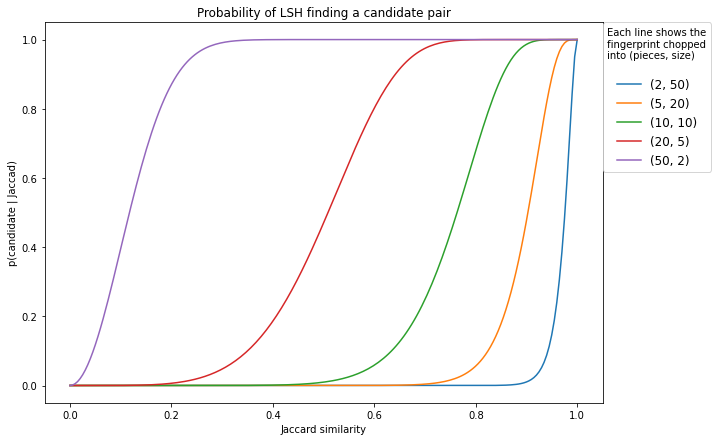

In [ ]:


df = pd.DataFrame(data=[(2, 50), (50, 2), (10, 10), (5, 20), (20, 5)], columns=['pieces', 'size'])
df['hashes'] = df['pieces'] * df['size']
for pr in np.linspace(0, 1, 200):
    df[pr] = 1 - (1 - pr**df['size']) ** df['pieces']

df = pd.pivot_table(df, index=['hashes', 'pieces', 'size'])

ax = df.T.plot(figsize=(10, 7), title='Probability of LSH finding a candidate pair');
plt.ylabel('p(candidate | Jaccad)');
plt.xlabel('Jaccard similarity');
plt.legend(list(df.loc[ix[100]].index),
           bbox_to_anchor=(1., 1, 1., 0), loc='upper left', fontsize=12, 
           ncol=1, borderaxespad=0., title='Each line shows the\nfingerprint chopped\ninto (pieces, size)\n');

The figure shows the probability that LSH with minhash will find a pair of similar documents (y-axis) given the Jaccard similarity (x-axis) of those documents for different settings for LSH. Each of the five lines correspond to different settings, the number of hashes is always 100 so we are just changing the number of pieces to chop each fingerprint into (and the size of those pieces, although that becomes determined by setting the number of hashes).
Creating just two pieces with 50 rows each - that is two localities, each with a size of 50 minhashes - yields an LSH model (blue line) that tries really really hard not to find documents to be similar. This LSH model will find 80% of documents whose actual Jaccard similarity is over 95%. Documents whose Jaccard similarity is 80% will hardly ever be found to be similar.
Creating 5 pieces with 20 rows (green line) each is slightly more 
relaxed. The above graph should give you a pretty good idea how to set the parameters for your use case so that you can be reasonably certain that LSH will generate acceptable candidate pairs.


In [ ]:
# take b and r as input 
# r=int(input())
# b=int(input())
b=10
r=int(noOfPermutation/b)
r

10